Notes taken from:
    
Learning Path: Deep Dive into Python Machine Learning, presented by Eder Santana, Chapter 4
    
by Ankita Thakur - Curator

Published by Packt Publishing, 2016

Learn what is Deep Learning, Convolutional and Pooling Layers in Theano and Keras

Convolutional is a sequence of sliding and projectional operations.

Convolutional is feature matching.



Pooling is down sampling of an image or factor.

Pooling is a best tch detection.

In [1]:
%matplotlib inline

import numpy as np
from scipy.misc import lena
from theano import tensor as T, function
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D

Using Theano backend.


## Input image and filter 

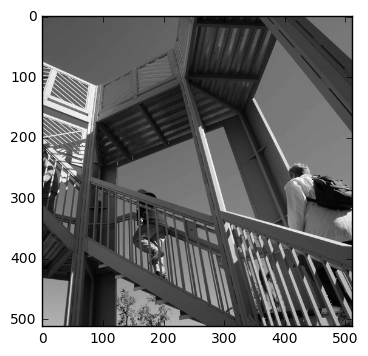

In [8]:
#img = lena() is no longer available, please use ascent() or face()
import scipy.misc
img = scipy.misc.ascent()
plt.imshow(img, cmap='gray')

# a tensor of 4 dimensions: 1 image, 1 channel because of grey-scale, num of rows, num of columns
I = img.reshape((1, 1, img.shape[0], img.shape[1]))

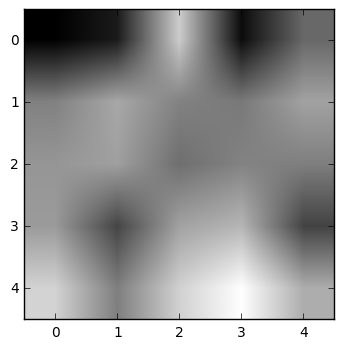

In [11]:
# Second tensor will be a filter with 4 dimensions
# 1st dim is # of channels in output image, 2nd dim is # channels in input image, 3rd dim is num of rows in filter, 4th dim is num of cols in filter
w = np.random.randn(1, 1, 5, 5) # try a random filter
plt.imshow(w[0,0], cmap='gray')

## Theano convolution

In [13]:
# Define the tensors
X, W = T.tensor4s('X', 'W')
# Use a symbolic expression, use conv2d to do convolution and pooling
Y = T.nnet.conv.conv2d(X, W,
                      border_mode='valid',  # only projection where filter is completely inside the image is considered
                      image_shape=I[:1].shape,  
                      filter_shape=w.shape)
F = function([X, W], Y, allow_input_downcast=True)

In [14]:
I.shape

(1, 1, 512, 512)

(1, 1, 508, 508)


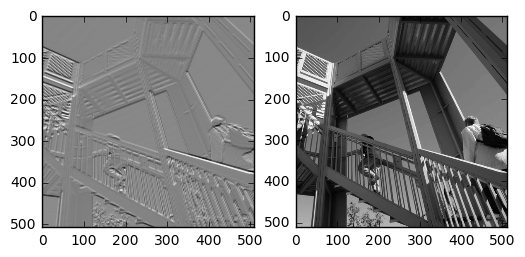

In [15]:
out = F(I, w)

print(out.shape)

plt.subplot(121)
plt.imshow(out[0, 0], cmap='gray')
plt.subplot(122)
plt.imshow(img, cmap='gray')

# output is a contrast-reduced image

## Keras convolution 

In [16]:
nb_output_chan = 1
nb_rows = 5
nb_cols = 5

# pool size is 8 x 8 though in practice it is usually 2 X 2
pool_row = 8
pool_col = 8

model = Sequential()
model.add(Convolution2D(nb_output_chan, nb_rows, nb_cols,
                       border_mode='valid',
                       input_shape=I.shape[1:]))
model.add(MaxPooling2D(pool_size=(pool_row, pool_col)))

model.compile(loss='mse', optimizer='sgd')

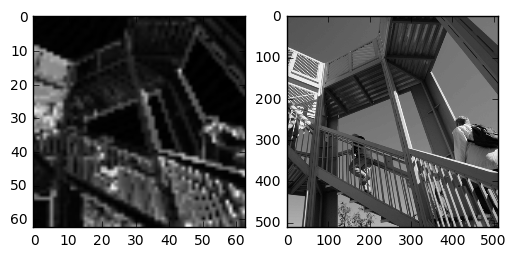

In [17]:
out = model.predict(I)

plt.subplot(121)
plt.imshow(out[0,0], cmap='gray')
plt.subplot(122)
plt.imshow(img, cmap='gray')

# details are filtered out in the output; just the essence of the image remains. 